In [1]:
import pandas as pd
import numpy as np
import sqlite3

# Reconnect to the database
conn = sqlite3.connect('./ipl_database.db')
# Query the database
df_ball = pd.read_sql_query('SELECT * FROM ipl_ball_by_ball;', conn)

# Display the first few rows of the table
print(df_ball)

# Close the connection
conn.close()


             ID  innings  overs  ballnumber       batter          bowler   
0       1312200        1      0           1  YBK Jaiswal  Mohammed Shami  \
1       1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2       1312200        1      0           3   JC Buttler  Mohammed Shami   
3       1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4       1312200        1      0           5  YBK Jaiswal  Mohammed Shami   
...         ...      ...    ...         ...          ...             ...   
225949   335982        2     14           5      P Kumar        I Sharma   
225950   335982        2     14           6     SB Joshi        I Sharma   
225951   335982        2     14           7      P Kumar        I Sharma   
225952   335982        2     15           1     SB Joshi       LR Shukla   
225953   335982        2     15           2     SB Joshi       LR Shukla   

        non-striker extra_type  batsman_run  extras_run  total_run   
0        JC Buttl

In [2]:
unique_batters = df_ball['batter'].unique().tolist()

print(unique_batters)

['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pandya', 'DA Miller', 'V Kohli', 'F du Plessis', 'RM Patidar', 'GJ Maxwell', 'MK Lomror', 'KD Karthik', 'Shahbaz Ahmed', 'PWH de Silva', 'HV Patel', 'JR Hazlewood', 'Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda', 'MP Stoinis', 'E Lewis', 'KH Pandya', 'PVD Chameera', 'PK Garg', 'Abhishek Sharma', 'RA Tripathi', 'AK Markram', 'N Pooran', 'Washington Sundar', 'R Shepherd', 'J Suchith', 'B Kumar', 'Umran Malik', 'JM Bairstow', 'S Dhawan', 'M Shahrukh Khan', 'MA Agarwal', 'LS Livingstone', 'JM Sharma', 'PN Mankad', 'PP Shaw', 'DA Warner', 'MR Marsh', 'RR Pant', 'SN Khan', 'R Powell', 'AR Patel', 'SN Thakur', 'Kuldeep Yadav', 'Ishan Kishan', 'RG Sharma', 'D Brevis', 'Tilak Varma', 'TH David', 'Ramandeep Singh', 'DR Sams', 'RD Gaikwad', 'DP Conway', 'MM Ali', 'N Jagadeesan', 'AT Rayudu', 'MS Dhoni', 'Simarjeet Singh', 'MJ Santner', 'R 

In [3]:
import sqlite3
import pandas as pd

def get_batting_stats(player_name):
    # Establish a connection to the SQLite database
    conn = sqlite3.connect('./ipl_database.db')

    # Define the SQL query with the corrected column name
    query = f'''
    SELECT
        innings,
        overs,
        SUM(CASE WHEN batter = ? THEN batsman_run ELSE 0 END) AS runs_scored,
        SUM((CASE WHEN isWicketDelivery = 1 AND player_out == ? THEN 1 ELSE 0 END)) AS Dismissals,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced,
        COUNT(CASE WHEN (extra_type IS NULL OR extra_type = 'byes' OR extra_type = 'legbyes' OR extra_type = 'noballs') AND (batter = ?) THEN 1 ELSE NULL END) AS balls_faced,
        COUNT(CASE WHEN (batsman_run = 6) AND (batter = ?) THEN 1 ELSE NULL END) AS Sixes,
        COUNT(CASE WHEN (batsman_run = 4) AND (batter = ?) THEN 1 ELSE NULL END) AS Fours
    FROM
        ipl_ball_by_ball
    WHERE
        batter = ? or "non-striker" = ?
    GROUP BY
        innings,
        overs
    ORDER BY
        innings,
        overs;
    '''

    # Execute the query with the player name as a parameter
    df = pd.read_sql_query(query, conn, params=(player_name, player_name, player_name, player_name, player_name, player_name, player_name, player_name))

    # Close the connection
    conn.close()
    df["Sixer_Percentage"] = df["Sixes"]*6/ df["runs_scored"]
    df["Four_Percentage"] = df["Fours"]*4/ df["runs_scored"]
    return df

# Example usage
player_name = 'AB de Villiers'  # Replace with the actual player name
batter_stats_df = get_batting_stats(player_name)
batter_stats_df

,innings,overs,runs_scored,Dismissals,balls_faced,Sixes,Fours,Sixer_Percentage,Four_Percentage
0,1,0,19,0,10,0,4,0.000000,0.842105
1,1,1,22,1,23,0,4,0.000000,0.727273
2,1,2,28,1,38,1,2,0.214286,0.285714
3,1,3,83,0,76,4,9,0.289157,0.433735
4,1,4,114,2,72,3,16,0.157895,0.561404
5,1,5,144,2,92,4,21,0.166667,0.583333
6,1,6,118,2,95,1,10,0.050847,0.338983
7,1,7,110,4,97,1,9,0.054545,0.327273
8,1,8,127,2,105,3,11,0.141732,0.346457
9,1,9,162,2,120,6,7,0.222222,0.172840


In [4]:
# Assuming you have a DataFrame named batter_stats_df
# Filter the DataFrame based on innings, overs range, and runs scored
innings_x = 1  # Specify the innings
overs_y = 6  # Specify the starting over
overs_z = 10  # Specify the ending over

filtered_batter_df = batter_stats_df[
    (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
    (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
    (batter_stats_df['overs'] <= overs_z)
]

# Print the filtered DataFrame
filtered_batter_df

,innings,overs,runs_scored,Dismissals,balls_faced,Sixes,Fours,Sixer_Percentage,Four_Percentage
6,1,6,118,2,95,1,10,0.050847,0.338983
7,1,7,110,4,97,1,9,0.054545,0.327273
8,1,8,127,2,105,3,11,0.141732,0.346457
9,1,9,162,2,120,6,7,0.222222,0.172840
10,1,10,172,5,134,7,10,0.244186,0.232558
26,2,6,93,5,95,0,7,0.000000,0.301075
27,2,7,111,3,99,3,6,0.162162,0.216216
28,2,8,133,4,113,4,11,0.180451,0.330827
29,2,9,133,3,106,6,8,0.270677,0.240602
30,2,10,136,4,103,7,9,0.308824,0.264706


In [5]:
def stat(player_name, batter_stats_df, overs_y, overs_z):
    # Assuming you have a DataFrame named batter_stats_df
    # Filter the DataFrame based on innings, overs range, and runs scored
     # Specify the ending over

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]

    print(filtered_batter_df)

    # Print the filtered DataFrame
    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
    four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
    print(player_name)
    print(runs_score, balls_faced, dismissals, average, strike_rate)

    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate, four_percentage, sixer_percentage]

stat("AB de Villiers", get_batting_stats("AB de Villiers"), 6, 10)

    innings  overs  runs_scored  Dismissals  balls_faced  Sixes  Fours   
6         1      6          118           2           95      1     10  \
7         1      7          110           4           97      1      9   
8         1      8          127           2          105      3     11   
9         1      9          162           2          120      6      7   
10        1     10          172           5          134      7     10   
26        2      6           93           5           95      0      7   
27        2      7          111           3           99      3      6   
28        2      8          133           4          113      4     11   
29        2      9          133           3          106      6      8   
30        2     10          136           4          103      7      9   

    Sixer_Percentage  Four_Percentage  
6           0.050847         0.338983  
7           0.054545         0.327273  
8           0.141732         0.346457  
9           0.222222     

['AB de Villiers',
 1295,
 1067,
 34,
 38.088235294117645,
 121.36832239925025,
 0.27181467181467184,
 0.17606177606177606]

In [6]:
runs_score = filtered_batter_df["runs_scored"].sum()
balls_faced = filtered_batter_df["balls_faced"].sum()
dismissals = filtered_batter_df["Dismissals"].sum()
average = runs_score/dismissals
strike_rate = (runs_score/balls_faced)*100
print(runs_score, balls_faced, dismissals, average, strike_rate)

1295 1067 34 38.088235294117645 121.36832239925025


In [7]:
def batting_stats_overs(player_name, batter_stats_df , overs_y, overs_z):

    filtered_batter_df = batter_stats_df[
        (batter_stats_df['innings'].isin([1, 2])) &  # Filter by innings
        (batter_stats_df['overs'] >= overs_y) &      # Filter by starting over
        (batter_stats_df['overs'] <= overs_z)
    ]


    runs_score = filtered_batter_df["runs_scored"].sum()
    balls_faced = filtered_batter_df["balls_faced"].sum()
    dismissals = filtered_batter_df["Dismissals"].sum()
    sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
    four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
    average = runs_score/dismissals
    strike_rate = (runs_score/balls_faced)*100
    
    return [player_name, runs_score, balls_faced, dismissals, average, strike_rate, four_percentage, sixer_percentage]

# Best Batters in the Powerplay

In [8]:
batting_power_play = []
for i in unique_batters:
    df = get_batting_stats(i)
    batting_power_play.append(batting_stats_overs(i, df, 0, 5))

C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipy

In [9]:
batting_power_play

[['YBK Jaiswal',
  366,
  272,
  12,
  30.5,
  134.55882352941177,
  0.5245901639344263,
  0.22950819672131148],
 ['JC Buttler',
  1229,
  854,
  26,
  47.26923076923077,
  143.9110070257611,
  0.5109845402766476,
  0.26851098454027666],
 ['SV Samson',
  999,
  849,
  35,
  28.542857142857144,
  117.6678445229682,
  0.4844844844844845,
  0.18018018018018017],
 ['D Padikkal',
  631,
  512,
  19,
  33.21052631578947,
  123.2421875,
  0.5388272583201268,
  0.12361331220285261],
 ['SO Hetmyer',
  53,
  51,
  2,
  26.5,
  103.921568627451,
  0.4528301886792453,
  0.22641509433962265],
 ['R Ashwin',
  58,
  56,
  4,
  14.5,
  103.57142857142858,
  0.6206896551724138,
  0.20689655172413793],
 ['R Parag', 0, 11, 1, 0.0, 0.0, nan, nan],
 ['TA Boult', 0, 0, 0, nan, nan, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  972,
  727,
  35,
  27.771428571428572,
  133.70013755158183,
  0.551440329218107,
  0.18518518518518517],
 ['Shubman Gill',
  882,
  729,
  22,
  40.090909090

In [10]:
batting_power_play_df = pd.DataFrame(batting_power_play, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_power_play_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,366,272,12,30.500000,134.558824,0.524590,0.229508
1,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511
2,SV Samson,999,849,35,28.542857,117.667845,0.484484,0.180180
3,D Padikkal,631,512,19,33.210526,123.242188,0.538827,0.123613
4,SO Hetmyer,53,51,2,26.500000,103.921569,0.452830,0.226415
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,4,3,0,inf,133.333333,1.000000,0.000000


In [11]:
sorted_batting_powerplay_df = batting_power_play_df.sort_values('runs', ascending=False)
filtered_sorted_batting_powerplay_df = sorted_batting_powerplay_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_powerplay_df))
filtered_sorted_batting_powerplay_df

54


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
43,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938
50,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647
189,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568
280,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592
14,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412
101,AM Rahane,2049,1783,65,31.523077,114.918676,0.532943,0.108346
105,RV Uthappa,2035,1636,62,32.822581,124.388753,0.513022,0.147420
242,PA Patel,1904,1565,73,26.082192,121.661342,0.594538,0.097689
59,RG Sharma,1632,1389,55,29.672727,117.494600,0.460784,0.231618
24,Q de Kock,1631,1248,45,36.244444,130.689103,0.446352,0.239117


In [12]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_powerplay_df = filtered_sorted_batting_powerplay_df.reset_index(drop=True)
len(filtered_sorted_batting_powerplay_df)

54

In [13]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
data = filtered_sorted_batting_powerplay_df
# Handle missing values
data = data.dropna()

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage']])

# Create and train the neural network
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(5,)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse')
model.fit(X, X, epochs=100, batch_size=32, verbose=0)

# Inspect the model's summary to find the correct layer name
model.summary()

encoder = tf.keras.Model(model.input, model.layers[-2].output)
print(encoder)
encoded_data = encoder.predict(X)
print("encoder data")
print(encoded_data)
# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Assign the cluster labels back to the original data
data['Cluster'] = labels





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)              

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
type(encoded_data)

numpy.ndarray

In [15]:
encoded_data.shape

(54, 8)

In [16]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,2
13,BB McCullum,1555,1220,57,27.280702,127.459016,0.473312,0.270096,2
45,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,2
32,RA Tripathi,779,549,24,32.458333,141.894353,0.492940,0.223363,2
47,LMP Simmons,542,460,12,45.166667,117.826087,0.494465,0.210332,2
29,Shubman Gill,882,729,22,40.090909,120.987654,0.526077,0.108844,2
26,WP Saha,972,727,35,27.771429,133.700138,0.551440,0.185185,2
21,SR Tendulkar,1143,982,26,43.961538,116.395112,0.612423,0.052493,2
19,DR Smith,1213,976,27,44.925926,124.282787,0.511129,0.232481,2
17,AC Gilchrist,1385,1033,48,28.854167,134.075508,0.551625,0.212274,2


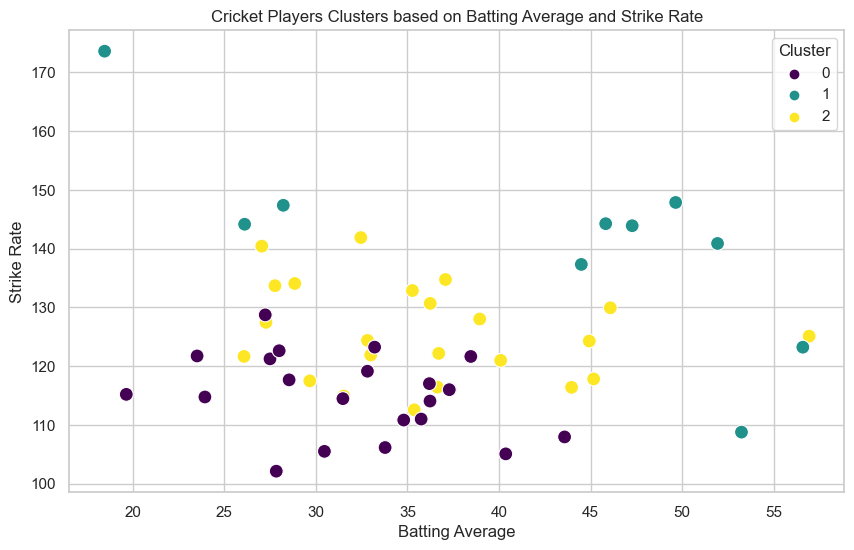

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.cluster import KMeans

# Assuming 'filtered_sorted_batting_powerplay_df' is your DataFrame
data = filtered_sorted_batting_powerplay_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage']])

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5
input_data = Input(shape=(input_shape,))

# Build the autoencoder model
encoded = Dense(32, activation='relu')(input_data)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck layer

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(input_shape, activation='linear')(decoded)  # Output layer with same size as input

autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder
history = autoencoder.fit(X, X,
                          epochs=100,
                          batch_size=32,
                          shuffle=True,
                          verbose=0,
                          validation_split=0.2)  # Add validation split for model evaluation

# Encode the data using the trained encoder
encoded_data = encoder.predict(X)

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Add the cluster labels back to the original DataFrame
data['Cluster'] = labels

2/2 [==============================] - 0s 2ms/step


c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
# Assuming 'data' is your DataFrame
sorted_data = data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
19,DR Smith,1213,976,27,44.925926,124.282787,0.511129,0.232481,2
14,SK Raina,1552,1168,44,35.272727,132.876712,0.510309,0.208763,2
40,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,2
36,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,2
35,SE Marsh,767,730,19,40.368421,105.068493,0.599739,0.062581,2
33,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,2
28,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,2
24,JH Kallis,1036,982,34,30.470588,105.498982,0.579151,0.086873,2
21,SR Tendulkar,1143,982,26,43.961538,116.395112,0.612423,0.052493,2
50,KC Sangakkara,522,450,14,37.285714,116.000000,0.620690,0.068966,2


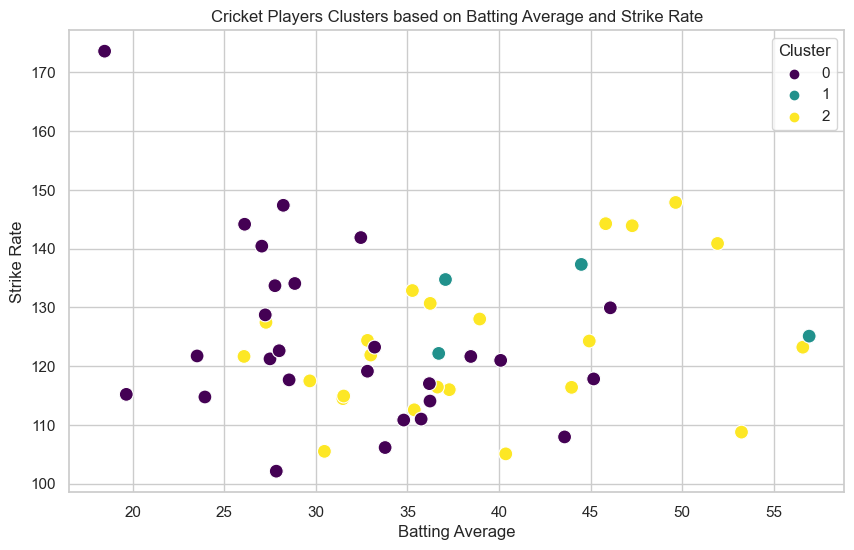

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Assuming 'filtered_sorted_batting_powerplay_df' is your DataFrame
data = filtered_sorted_batting_powerplay_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.055681973695755
Epoch 2, Loss: 0.9886804819107056
Epoch 3, Loss: 1.0105059742927551
Epoch 4, Loss: 0.9622816145420074
Epoch 5, Loss: 1.0008363127708435
Epoch 6, Loss: 0.9593331813812256
Epoch 7, Loss: 1.0389074981212616
Epoch 8, Loss: 0.9548133015632629
Epoch 9, Loss: 0.9691055119037628
Epoch 10, Loss: 0.9768644869327545
Epoch 11, Loss: 0.9730400145053864
Epoch 12, Loss: 0.9593281447887421
Epoch 13, Loss: 0.9652111530303955
Epoch 14, Loss: 0.9551182985305786
Epoch 15, Loss: 0.9245290160179138
Epoch 16, Loss: 0.9481313526630402
Epoch 17, Loss: 0.9270691871643066
Epoch 18, Loss: 0.9482747316360474
Epoch 19, Loss: 0.9234799444675446
Epoch 20, Loss: 0.9191016554832458
Epoch 21, Loss: 0.8903464376926422
Epoch 22, Loss: 0.888832688331604
Epoch 23, Loss: 0.866391658782959
Epoch 24, Loss: 0.9105151295661926
Epoch 25, Loss: 0.857742190361023
Epoch 26, Loss: 0.8259437084197998
Epoch 27, Loss: 0.8435522019863129
Epoch 28, Loss: 0.8786861598491669
Epoch 29, Loss: 0.812781035900116

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592
4,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412
5,AM Rahane,2049,1783,65,31.523077,114.918676,0.532943,0.108346
6,RV Uthappa,2035,1636,62,32.822581,124.388753,0.513022,0.147420
7,PA Patel,1904,1565,73,26.082192,121.661342,0.594538,0.097689
8,RG Sharma,1632,1389,55,29.672727,117.494600,0.460784,0.231618
9,Q de Kock,1631,1248,45,36.244444,130.689103,0.446352,0.239117


In [23]:
combined_data = pd.concat([filtered_sorted_batting_powerplay_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,S Dhawan,3157,2584,86,36.709302,122.174923,0.525816,0.134938,0
1,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,1
2,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,1
3,G Gambhir,2277,1868,69,33.000000,121.895075,0.544576,0.089592,0
4,V Kohli,2125,1825,58,36.637931,116.438356,0.506353,0.121412,0


In [24]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
53,SPD Smith,500,411,13,38.461538,121.654501,0.528000,0.120000,2
44,DPMD Jayawardene,605,499,22,27.500000,121.242485,0.614876,0.119008,2
31,MEK Hussey,828,767,19,43.578947,107.953064,0.507246,0.115942,2
30,SS Iyer,858,773,24,35.750000,110.996119,0.498834,0.139860,2
29,Shubman Gill,882,729,22,40.090909,120.987654,0.526077,0.108844,2
28,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,2
37,AB de Villiers,722,606,22,32.818182,119.141914,0.548476,0.149584,2
23,MK Pandey,1087,953,30,36.233333,114.060860,0.522539,0.121435,2
21,SR Tendulkar,1143,982,26,43.961538,116.395112,0.612423,0.052493,2
19,DR Smith,1213,976,27,44.925926,124.282787,0.511129,0.232481,2


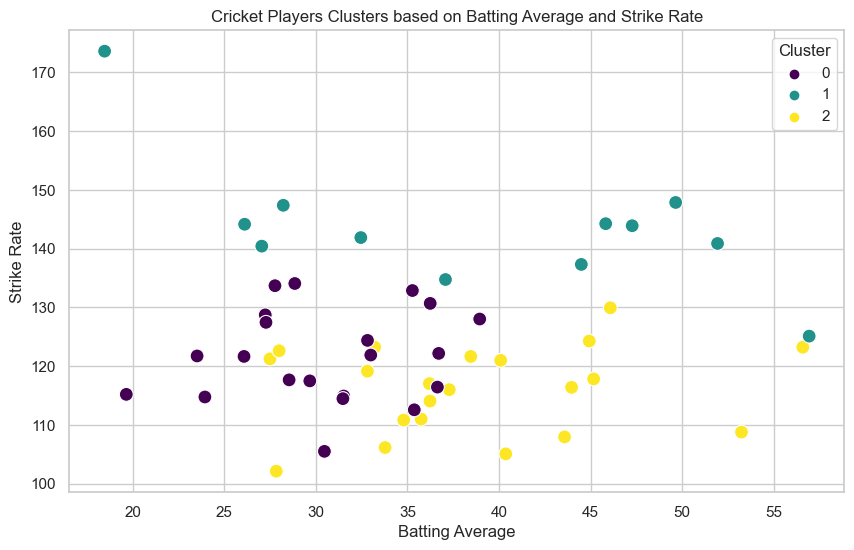

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_powerplay_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_powerplay_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_powerplay_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_powerplay_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100

2/2 [==============================] - 1s 4ms/step - loss: 0.6931 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6922 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6904 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6876 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6869 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy:

In [27]:
predictions

array([[0.60300666],
       [0.47735816],
       [0.3189802 ],
       [0.38782945],
       [0.41617382],
       [0.56433356],
       [0.51500523],
       [0.72395915],
       [0.31431568],
       [0.30008313],
       [0.42644605]], dtype=float32)

In [28]:
len(predictions)

11

In [29]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 3ms/step
[[0.41721836]
 [0.27219585]
 [0.38782945]
 [0.30489457]
 [0.44961527]
 [0.5411493 ]
 [0.32447454]
 [0.34279993]
 [0.47735816]
 [0.56433356]
 [0.3189802 ]
 [0.35991812]
 [0.69555444]
 [0.6077902 ]
 [0.48531356]
 [0.28645456]
 [0.35327515]
 [0.28185165]
 [0.1837046 ]
 [0.24575742]
 [0.34732783]
 [0.53716195]
 [0.7527253 ]
 [0.7442379 ]
 [0.76732   ]
 [0.732046  ]
 [0.62426716]
 [0.43128496]
 [0.50620383]
 [0.60300666]
 [0.52659225]
 [0.7239592 ]
 [0.78692245]
 [0.33187184]
 [0.19416964]
 [0.5158022 ]
 [0.39323387]
 [0.2695208 ]
 [0.41617382]
 [0.40964833]
 [0.33260262]
 [0.42644605]
 [0.31431568]
 [0.30431253]
 [0.51215327]
 [0.30008313]
 [0.35859433]
 [0.51500523]
 [0.5186577 ]
 [0.33097774]
 [0.42912236]
 [0.25654125]
 [0.21677743]
 [0.20415775]]


In [30]:
len(output_players_performance)

54

In [31]:
filtered_sorted_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,SPD Smith,500,411,13,38.461538,121.654501,0.528000,0.120000,2,0.423779
1,DPMD Jayawardene,605,499,22,27.500000,121.242485,0.614876,0.119008,2,0.281755
2,MEK Hussey,828,767,19,43.578947,107.953064,0.507246,0.115942,2,0.387691
3,SS Iyer,858,773,24,35.750000,110.996119,0.498834,0.139860,2,0.312564
4,Shubman Gill,882,729,22,40.090909,120.987654,0.526077,0.108844,2,0.453746
5,R Dravid,905,832,17,53.235294,108.774038,0.654144,0.046409,2,0.523028
6,AB de Villiers,722,606,22,32.818182,119.141914,0.548476,0.149584,2,0.337678
7,MK Pandey,1087,953,30,36.233333,114.060860,0.522539,0.121435,2,0.353183
8,SR Tendulkar,1143,982,26,43.961538,116.395112,0.612423,0.052493,2,0.475358
9,DR Smith,1213,976,27,44.925926,124.282787,0.511129,0.232481,2,0.556716


# Best Batters In the Powerplay

In [32]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Predicted Performance'])

# Concatenate the two dataframes along the column axis
merged_batting_powerplay_df = pd.concat([filtered_sorted_batting_powerplay_df, performance_df], axis=1)
merged_batting_powerplay_df = merged_batting_powerplay_df.sort_values('Predicted Performance', ascending=False)
merged_batting_powerplay_df = merged_batting_powerplay_df.reset_index(drop=True)
merged_batting_powerplay_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Predicted Performance
0,JM Bairstow,695,470,14,49.642857,147.872340,0.506475,0.258993,1,0.796487,0.786922
1,SA Yadav,727,516,14,51.928571,140.891473,0.577717,0.181568,1,0.768834,0.767320
2,JC Buttler,1229,854,26,47.269231,143.911007,0.510985,0.268511,1,0.752485,0.752725
3,KL Rahul,1594,1274,28,56.928571,125.117739,0.431619,0.233375,1,0.734117,0.744238
4,DA Warner,2892,2106,65,44.492308,137.321937,0.511757,0.184647,1,0.723681,0.732046
5,CA Lynn,779,540,17,45.823529,144.259259,0.508344,0.284981,1,0.719674,0.723959
6,Ishan Kishan,679,551,12,56.583333,123.230490,0.518409,0.194404,2,0.679355,0.695554
7,SP Narine,665,383,36,18.472222,173.629243,0.517293,0.342857,1,0.606210,0.624267
8,ML Hayden,599,461,13,46.076923,129.934924,0.540902,0.200334,2,0.595999,0.607790
9,CH Gayle,2373,1761,64,37.078125,134.752981,0.445006,0.361568,1,0.586194,0.603007


# Batting Middle Overs Part 1

In [33]:
batting_middle_one = []
for i in unique_batters:
    batting_middle_one.append(batting_stats_overs(i, get_batting_stats(i), 6, 10))

C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:1

In [34]:
batting_stats_overs("AB de Villiers", get_batting_stats("AB de Villiers") , 6, 10)

['AB de Villiers',
 1295,
 1067,
 34,
 38.088235294117645,
 121.36832239925025,
 0.27181467181467184,
 0.17606177606177606]

In [35]:
batting_middle_one

[['YBK Jaiswal',
  134,
  97,
  6,
  22.333333333333332,
  138.1443298969072,
  0.26865671641791045,
  0.31343283582089554],
 ['JC Buttler',
  658,
  493,
  14,
  47.0,
  133.46855983772818,
  0.3100303951367781,
  0.20972644376899696],
 ['SV Samson',
  1209,
  901,
  34,
  35.55882352941177,
  134.18423973362928,
  0.23159636062861869,
  0.28287841191067],
 ['D Padikkal',
  334,
  280,
  8,
  41.75,
  119.28571428571428,
  0.2874251497005988,
  0.2155688622754491],
 ['SO Hetmyer',
  49,
  47,
  3,
  16.333333333333332,
  104.25531914893618,
  0.08163265306122448,
  0.3673469387755102],
 ['R Ashwin', 33, 39, 1, 33.0, 84.61538461538461, 0.12121212121212122, 0.0],
 ['R Parag',
  71,
  78,
  2,
  35.5,
  91.02564102564102,
  0.39436619718309857,
  0.08450704225352113],
 ['TA Boult', 0, 0, 0, nan, nan, nan, nan],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  428,
  460,
  20,
  21.4,
  93.04347826086956,
  0.2803738317757009,
  0.04205607476635514],
 ['Shubman Gill',
  479,
  

In [36]:
batting_middle_one_df = pd.DataFrame(batting_middle_one, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,134,97,6,22.333333,138.144330,0.268657,0.313433
1,JC Buttler,658,493,14,47.000000,133.468560,0.310030,0.209726
2,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
3,D Padikkal,334,280,8,41.750000,119.285714,0.287425,0.215569
4,SO Hetmyer,49,47,3,16.333333,104.255319,0.081633,0.367347
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,0,0,0,NaN,NaN,NaN,NaN
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,14,13,1,14.000000,107.692308,0.571429,0.000000


In [37]:
sorted_batting_middle_one_df = batting_middle_one_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_one_df = sorted_batting_middle_one_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_one_df))
filtered_sorted_batting_middle_one_df

45


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
14,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917
179,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692
43,S Dhawan,1624,1351,43,37.767442,120.207254,0.349754,0.103448
50,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264
105,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510
59,RG Sharma,1420,1336,54,26.296296,106.287425,0.273239,0.160563
176,AB de Villiers,1295,1067,34,38.088235,121.368322,0.271815,0.176062
189,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658
2,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
220,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_middle_one_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.0061050355434418
Epoch 2, Loss: 0.9574486613273621
Epoch 3, Loss: 1.0464588701725006
Epoch 4, Loss: 1.098356455564499
Epoch 5, Loss: 0.9751958549022675
Epoch 6, Loss: 0.9782833755016327
Epoch 7, Loss: 0.927625983953476
Epoch 8, Loss: 0.8973798155784607
Epoch 9, Loss: 0.9579295217990875
Epoch 10, Loss: 0.955815464258194
Epoch 11, Loss: 0.9465878307819366
Epoch 12, Loss: 0.9540800154209137
Epoch 13, Loss: 0.8658997416496277
Epoch 14, Loss: 0.964702695608139
Epoch 15, Loss: 0.8877656757831573
Epoch 16, Loss: 0.8506529331207275
Epoch 17, Loss: 1.0099149644374847
Epoch 18, Loss: 0.8813070952892303
Epoch 19, Loss: 0.8794867992401123
Epoch 20, Loss: 1.0083958804607391
Epoch 21, Loss: 0.8707456290721893
Epoch 22, Loss: 0.8816117346286774
Epoch 23, Loss: 0.9020187854766846
Epoch 24, Loss: 0.8296217918395996
Epoch 25, Loss: 1.0190344750881195
Epoch 26, Loss: 0.847644031047821
Epoch 27, Loss: 0.9062447249889374
Epoch 28, Loss: 0.8578482568264008
Epoch 29, Loss: 0.8354455828666687

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
14,V Kohli,1801,1583,36,50.027778,113.771320,0.286507,0.149917
179,SK Raina,1786,1460,48,37.208333,122.328767,0.320269,0.174692
43,S Dhawan,1624,1351,43,37.767442,120.207254,0.349754,0.103448
50,DA Warner,1546,1163,33,46.848485,132.932072,0.245796,0.252264
105,RV Uthappa,1462,1214,55,26.581818,120.428336,0.309166,0.217510
59,RG Sharma,1420,1336,54,26.296296,106.287425,0.273239,0.160563
176,AB de Villiers,1295,1067,34,38.088235,121.368322,0.271815,0.176062
189,CH Gayle,1221,859,31,39.387097,142.142026,0.190008,0.476658
2,SV Samson,1209,901,34,35.558824,134.184240,0.231596,0.282878
220,SR Watson,1158,800,36,32.166667,144.750000,0.324698,0.321244


In [40]:
combined_data = pd.concat([filtered_sorted_batting_middle_one_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
14,V Kohli,1801.0,1583.0,36.0,50.027778,113.771320,0.286507,0.149917,1.0
179,SK Raina,1786.0,1460.0,48.0,37.208333,122.328767,0.320269,0.174692,NaN
43,S Dhawan,1624.0,1351.0,43.0,37.767442,120.207254,0.349754,0.103448,1.0
50,DA Warner,1546.0,1163.0,33.0,46.848485,132.932072,0.245796,0.252264,NaN
105,RV Uthappa,1462.0,1214.0,55.0,26.581818,120.428336,0.309166,0.217510,NaN


In [41]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...
219,M Vijay,592.0,501.0,31.0,19.096774,118.163673,0.283784,0.162162,NaN
84,KS Williamson,569.0,522.0,11.0,51.727273,109.003831,0.281195,0.147627,NaN
58,Ishan Kishan,566.0,457.0,15.0,37.733333,123.851204,0.240283,0.286219,NaN
337,MEK Hussey,552.0,475.0,12.0,46.000000,116.210526,0.289855,0.141304,NaN


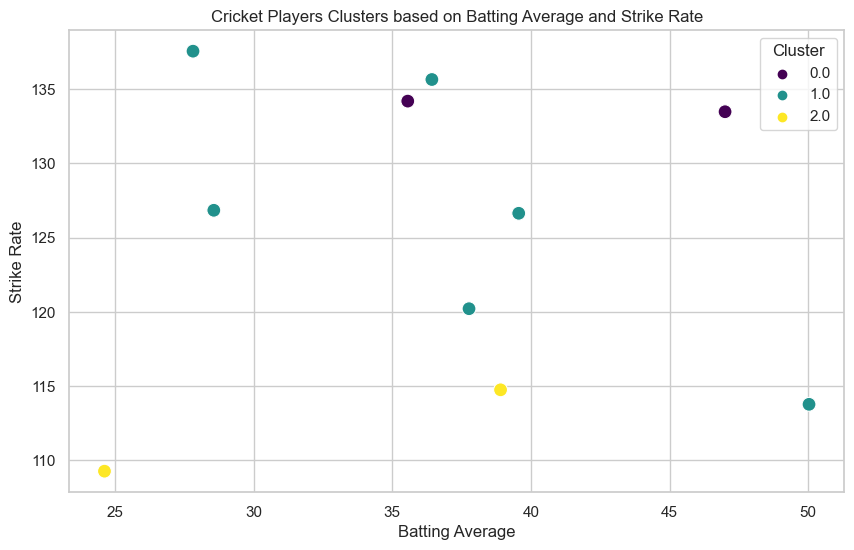

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [43]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_one_df = filtered_sorted_batting_middle_one_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_one_df)

45

In [44]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_middle_one_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_one_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.6

# Create a new column for the composite score
filtered_sorted_batting_middle_one_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_one_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0000e+00
Epoch 11/100
2/2 [=

In [45]:
predictions

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [46]:
len(predictions)

16

In [47]:
output_players_performance = model.predict(X)
print(output_players_performance)

3/3 [==============================] - 0s 2ms/step
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


In [48]:
len(output_players_performance)

80

In [49]:
filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...
75,M Vijay,592.0,501.0,31.0,19.096774,118.163673,0.283784,0.162162,NaN,0.225062
76,KS Williamson,569.0,522.0,11.0,51.727273,109.003831,0.281195,0.147627,NaN,0.535508
77,Ishan Kishan,566.0,457.0,15.0,37.733333,123.851204,0.240283,0.286219,NaN,0.487968
78,MEK Hussey,552.0,475.0,12.0,46.000000,116.210526,0.289855,0.141304,NaN,0.523798


# Best Batters In the Middle Part 1

In [50]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_one_df = pd.concat([filtered_sorted_batting_middle_one_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_one_df = merged_filtered_sorted_batting_middle_one_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_one_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
75,M Vijay,592.0,501.0,31.0,19.096774,118.163673,0.283784,0.162162,NaN,0.225062,NaN
76,KS Williamson,569.0,522.0,11.0,51.727273,109.003831,0.281195,0.147627,NaN,0.535508,NaN
77,Ishan Kishan,566.0,457.0,15.0,37.733333,123.851204,0.240283,0.286219,NaN,0.487968,NaN
78,MEK Hussey,552.0,475.0,12.0,46.000000,116.210526,0.289855,0.141304,NaN,0.523798,NaN


# Batting Middle Overs Part 2

In [51]:
batting_middle_two = []
for i in unique_batters:
    batting_middle_two.append(batting_stats_overs(i, get_batting_stats(i), 11, 15))

C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:15: RuntimeWarning: divide by zero encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:15: RuntimeWarning: divide by zero encou

In [52]:
batting_middle_two

[['YBK Jaiswal',
  47,
  37,
  5,
  9.4,
  127.02702702702702,
  0.425531914893617,
  0.1276595744680851],
 ['JC Buttler',
  616,
  381,
  19,
  32.421052631578945,
  161.67979002624674,
  0.2922077922077922,
  0.33116883116883117],
 ['SV Samson',
  880,
  621,
  29,
  30.344827586206897,
  141.70692431561997,
  0.2636363636363636,
  0.26590909090909093],
 ['D Padikkal',
  265,
  193,
  11,
  24.09090909090909,
  137.30569948186528,
  0.3471698113207547,
  0.2490566037735849],
 ['SO Hetmyer',
  298,
  232,
  8,
  37.25,
  128.44827586206898,
  0.3087248322147651,
  0.24161073825503357],
 ['R Ashwin',
  175,
  167,
  9,
  19.444444444444443,
  104.79041916167664,
  0.2057142857142857,
  0.2057142857142857],
 ['R Parag',
  196,
  165,
  7,
  28.0,
  118.7878787878788,
  0.2857142857142857,
  0.21428571428571427],
 ['TA Boult', 2, 6, 1, 2.0, 33.33333333333333, 0.0, 0.0],
 ['OC McCoy', 0, 0, 0, nan, nan, nan, nan],
 ['WP Saha',
  586,
  430,
  17,
  34.470588235294116,
  136.27906976744185

In [53]:
batting_middle_two_df = pd.DataFrame(batting_middle_two, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,47,37,5,9.400000,127.027027,0.425532,0.127660
1,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169
2,SV Samson,880,621,29,30.344828,141.706924,0.263636,0.265909
3,D Padikkal,265,193,11,24.090909,137.305699,0.347170,0.249057
4,SO Hetmyer,298,232,8,37.250000,128.448276,0.308725,0.241611
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,0,0,0,NaN,NaN,NaN,NaN
601,MA Khote,12,9,1,12.000000,133.333333,0.000000,0.500000
602,SB Joshi,6,14,2,3.000000,42.857143,0.000000,0.000000
603,DS Lehmann,0,2,1,0.000000,0.000000,NaN,NaN


In [54]:
sorted_batting_middle_two_df = batting_middle_two_df.sort_values('runs', ascending=False)
filtered_sorted_batting_middle_two_df = sorted_batting_middle_two_df.query('runs >= 500').dropna()
print(len(filtered_sorted_batting_middle_two_df))
filtered_sorted_batting_middle_two_df

43


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
70,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871
176,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863
14,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501
59,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165
19,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038
179,SK Raina,1526,1026,54,28.259259,148.732943,0.290957,0.263434
69,AT Rayudu,1467,1047,48,30.562500,140.114613,0.289025,0.298569
116,KA Pollard,1366,1033,34,40.176471,132.236205,0.240117,0.360176
262,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.294210,0.328638
241,YK Pathan,1206,847,44,27.409091,142.384888,0.262023,0.348259


In [55]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_middle_two_df = filtered_sorted_batting_middle_two_df.reset_index(drop=True)
len(filtered_sorted_batting_middle_two_df)

43

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_middle_two_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.1024039089679718
Epoch 2, Loss: 1.0815730094909668
Epoch 3, Loss: 1.0319339334964752
Epoch 4, Loss: 1.0004647374153137
Epoch 5, Loss: 1.0354839265346527
Epoch 6, Loss: 1.1588625013828278
Epoch 7, Loss: 0.8691797256469727
Epoch 8, Loss: 1.036311149597168
Epoch 9, Loss: 0.9360356330871582
Epoch 10, Loss: 0.8915600478649139
Epoch 11, Loss: 1.0387799441814423
Epoch 12, Loss: 1.002795696258545
Epoch 13, Loss: 0.9282853603363037
Epoch 14, Loss: 1.0429090559482574
Epoch 15, Loss: 1.03584685921669
Epoch 16, Loss: 0.9043682813644409
Epoch 17, Loss: 1.049367904663086
Epoch 18, Loss: 1.0479108393192291
Epoch 19, Loss: 0.9000442922115326
Epoch 20, Loss: 1.0129291415214539
Epoch 21, Loss: 0.9068038165569305
Epoch 22, Loss: 0.9402373433113098
Epoch 23, Loss: 0.8683868050575256
Epoch 24, Loss: 0.8205316960811615
Epoch 25, Loss: 0.9903905093669891
Epoch 26, Loss: 0.9213275015354156
Epoch 27, Loss: 1.0196747481822968
Epoch 28, Loss: 0.8776001036167145
Epoch 29, Loss: 0.9102978110313416

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [57]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863
2,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038
5,SK Raina,1526,1026,54,28.259259,148.732943,0.290957,0.263434
6,AT Rayudu,1467,1047,48,30.562500,140.114613,0.289025,0.298569
7,KA Pollard,1366,1033,34,40.176471,132.236205,0.240117,0.360176
8,Yuvraj Singh,1278,931,43,29.720930,137.271751,0.294210,0.328638
9,YK Pathan,1206,847,44,27.409091,142.384888,0.262023,0.348259


In [58]:
combined_data = pd.concat([filtered_sorted_batting_middle_two_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,1781,1591,39,45.666667,111.942175,0.222347,0.208871,0
1,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0
2,V Kohli,1707,1230,51,33.470588,138.780488,0.260105,0.235501,0
3,RG Sharma,1682,1220,37,45.459459,137.868852,0.342449,0.221165,0
4,KD Karthik,1590,1188,53,30.000000,133.838384,0.349686,0.166038,0


In [59]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
21,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,2
10,DA Miller,1083,762,26,41.653846,142.125984,0.277008,0.277008,2
31,SE Marsh,684,427,21,32.571429,160.187354,0.327485,0.289474,2
32,N Rana,652,413,20,32.600000,157.869249,0.251534,0.404908,2
33,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169,2
19,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,2
15,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,2
12,RV Uthappa,1040,712,41,25.365854,146.067416,0.300000,0.300000,2
11,DA Warner,1044,699,28,37.285714,149.356223,0.283525,0.241379,2
13,RR Pant,1040,696,35,29.714286,149.425287,0.346154,0.282692,2


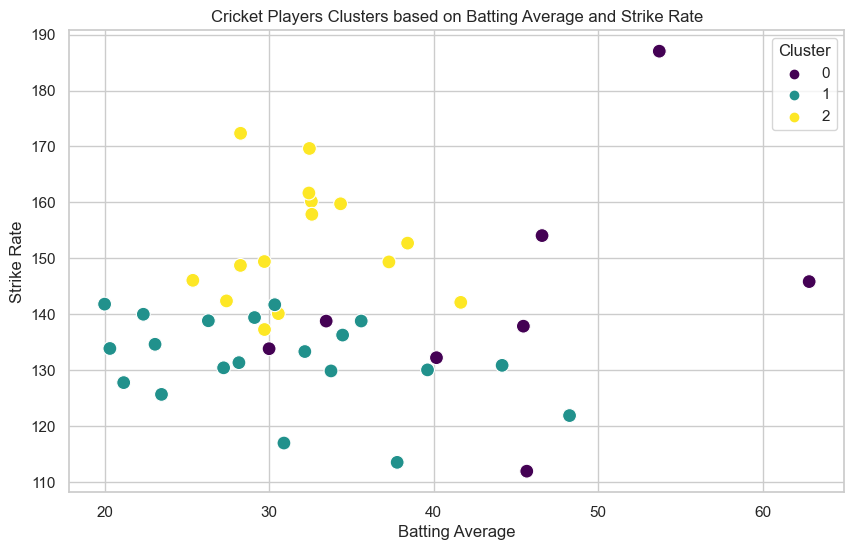

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [61]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_middle_two_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_middle_two_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.5
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_middle_two_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_middle_two_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 3ms/step - loss: 0.6897 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6879 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6869 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6860 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 0.6849 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 0.6842 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6829 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 

In [62]:
predictions

array([[0.48350286],
       [0.42568424],
       [0.59144336],
       [0.31172106],
       [0.32617396],
       [0.4037169 ],
       [0.4506139 ],
       [0.33655363],
       [0.44512022]], dtype=float32)

In [63]:
len(predictions)

9

In [64]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 3ms/step
[[0.6364936 ]
 [0.56980586]
 [0.58835155]
 [0.5705567 ]
 [0.5925512 ]
 [0.6166067 ]
 [0.6671139 ]
 [0.44512022]
 [0.5810643 ]
 [0.51172286]
 [0.44755822]
 [0.46545228]
 [0.50960565]
 [0.43683073]
 [0.59144336]
 [0.31172106]
 [0.37331736]
 [0.34089676]
 [0.4471573 ]
 [0.29982355]
 [0.4652347 ]
 [0.3177976 ]
 [0.30412707]
 [0.32617396]
 [0.35393593]
 [0.46297282]
 [0.42568424]
 [0.33655363]
 [0.3956138 ]
 [0.4376846 ]
 [0.41371134]
 [0.4506139 ]
 [0.34714162]
 [0.2957923 ]
 [0.4037169 ]
 [0.7368081 ]
 [0.7022827 ]
 [0.8809484 ]
 [0.48800823]
 [0.4267633 ]
 [0.57789016]
 [0.48350286]
 [0.39154842]]


In [65]:
len(output_players_performance)

43

In [66]:
filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,2,0.686403
1,DA Miller,1083,762,26,41.653846,142.125984,0.277008,0.277008,2,0.579327
2,SE Marsh,684,427,21,32.571429,160.187354,0.327485,0.289474,2,0.610340
3,N Rana,652,413,20,32.600000,157.869249,0.251534,0.404908,2,0.586554
4,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169,2,0.617158
5,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,2,0.643380
6,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,2,0.722379
7,RV Uthappa,1040,712,41,25.365854,146.067416,0.300000,0.300000,2,0.422558
8,DA Warner,1044,699,28,37.285714,149.356223,0.283525,0.241379,2,0.592670
9,RR Pant,1040,696,35,29.714286,149.425287,0.346154,0.282692,2,0.504617


# Best Batters In the Middle Part 2

In [67]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_middle_two_df = pd.concat([filtered_sorted_batting_middle_two_df, performance_df], axis=1)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_middle_two_df = merged_filtered_sorted_batting_middle_two_df.reset_index(drop=True)
merged_filtered_sorted_batting_middle_two_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,CH Gayle,967,517,18,53.722222,187.040619,0.231644,0.508790,0,1.129751,0.880948
1,KL Rahul,754,517,12,62.833333,145.841393,0.228117,0.286472,0,0.835366,0.736808
2,AB de Villiers,1724,1119,37,46.594595,154.066130,0.278422,0.288863,0,0.798610,0.702283
3,SR Watson,1006,593,31,32.451613,169.645868,0.349901,0.339960,2,0.722379,0.667114
4,GJ Maxwell,848,492,30,28.266667,172.357724,0.287736,0.424528,2,0.686403,0.636494
5,AD Russell,893,559,26,34.346154,159.749553,0.241881,0.510638,2,0.643380,0.616607
6,JC Buttler,616,381,19,32.421053,161.679790,0.292208,0.331169,2,0.617158,0.592551
7,KS Williamson,730,478,19,38.421053,152.719665,0.257534,0.279452,2,0.612627,0.591443
8,SE Marsh,684,427,21,32.571429,160.187354,0.327485,0.289474,2,0.610340,0.588352
9,DA Warner,1044,699,28,37.285714,149.356223,0.283525,0.241379,2,0.592670,0.581064


# Batting Death Overs

In [68]:
batting_death = []
for i in unique_batters:
    batting_death.append(batting_stats_overs(i, get_batting_stats(i), 16, 19))

C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:14: RuntimeWarning: invalid value encountered in scalar divide
  four_percentage = (filtered_batter_df["Fours"].sum() * 4) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:15: RuntimeWarning: invalid value encountered in scalar divide
  average = runs_score/dismissals
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:16: RuntimeWarning: invalid value encountered in scalar divide
  strike_rate = (runs_score/balls_faced)*100
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:13: RuntimeWarning: invalid value encountered in scalar divide
  sixer_percentage = (filtered_batter_df["Sixes"].sum() * 6) / runs_score
C:\Users\anubr\AppData\Local\Temp\ipykernel_27776\3886220328.py:1

In [69]:
batting_death

[['YBK Jaiswal', 0, 0, 0, nan, nan, nan, nan],
 ['JC Buttler',
  328,
  163,
  12,
  27.333333333333332,
  201.22699386503066,
  0.3048780487804878,
  0.42073170731707316],
 ['SV Samson',
  438,
  227,
  23,
  19.043478260869566,
  192.95154185022025,
  0.273972602739726,
  0.4383561643835616],
 ['D Padikkal',
  30,
  28,
  7,
  4.285714285714286,
  107.14285714285714,
  0.5333333333333333,
  0.0],
 ['SO Hetmyer',
  431,
  216,
  14,
  30.785714285714285,
  199.53703703703704,
  0.23201856148491878,
  0.4872389791183295],
 ['R Ashwin',
  381,
  288,
  34,
  11.205882352941176,
  132.29166666666669,
  0.3359580052493438,
  0.2047244094488189],
 ['R Parag',
  255,
  164,
  21,
  12.142857142857142,
  155.4878048780488,
  0.2980392156862745,
  0.32941176470588235],
 ['TA Boult',
  51,
  42,
  4,
  12.75,
  121.42857142857142,
  0.1568627450980392,
  0.23529411764705882],
 ['OC McCoy', 8, 5, 1, 8.0, 160.0, 0.0, 0.75],
 ['WP Saha',
  441,
  281,
  24,
  18.375,
  156.93950177935943,
  0.299

In [70]:
batting_death_df = pd.DataFrame(batting_death, columns=['Batter', 'runs', 'balls', 'Dismissals', 'average', 'strike_rate', 'four_percentage', 'sixer_percentage'])
batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,YBK Jaiswal,0,0,0,NaN,NaN,NaN,NaN
1,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732
2,SV Samson,438,227,23,19.043478,192.951542,0.273973,0.438356
3,D Padikkal,30,28,7,4.285714,107.142857,0.533333,0.000000
4,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239
...,...,...,...,...,...,...,...,...
600,D Kalyankrishna,3,8,1,3.000000,37.500000,0.000000,0.000000
601,MA Khote,12,13,1,12.000000,92.307692,0.666667,0.000000
602,SB Joshi,0,0,0,NaN,NaN,NaN,NaN
603,DS Lehmann,0,0,0,NaN,NaN,NaN,NaN


In [71]:
sorted_batting_death_df = batting_death_df.sort_values('runs', ascending=False)
filtered_sorted_batting_death_df = sorted_batting_death_df.query('runs >= 300').dropna()
print(len(filtered_sorted_batting_death_df))
filtered_sorted_batting_death_df

58


,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
70,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474
116,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136
176,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906
19,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933
135,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714
59,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734
12,HH Pandya,998,538,36,27.722222,185.501859,0.284569,0.432866
14,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487
241,YK Pathan,858,515,33,26.000000,166.601942,0.354312,0.265734
80,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984


In [72]:
# Reset index of filtered_sorted_batting_powerplay_df
filtered_sorted_batting_death_df = filtered_sorted_batting_death_df.reset_index(drop=True)
len(filtered_sorted_batting_death_df)

58

In [73]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = filtered_sorted_batting_death_df
data = data.dropna()  # Handle missing values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(data[['runs', 'average', 'strike_rate']])
X = torch.tensor(X, dtype=torch.float32)

# Define the input layer and bottleneck layer (encoding_dim)
input_shape = X.shape[1]
encoding_dim = 5

class Autoencoder(nn.Module):
    def __init__(self, input_shape, encoding_dim):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_shape, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, encoding_dim),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, input_shape),
            nn.Tanh()  # Use Tanh activation for output layer as it's similar to Linear activation in Keras
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(input_shape, encoding_dim)
encoder = autoencoder.encoder

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Create a DataLoader for efficient data loading
batch_size = 32
data_loader = DataLoader(torch.utils.data.TensorDataset(X), batch_size=batch_size, shuffle=True)

# Training loop
n_epochs = 100
for epoch in range(n_epochs):
    running_loss = 0.0
    for i, data in enumerate(data_loader, 0):
        inputs = data[0]  # Access input data only
        optimizer.zero_grad()

        outputs = autoencoder(inputs)
        loss = criterion(outputs, inputs)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch {epoch + 1}, Loss: {running_loss / (i + 1)}')

# Encode the data using the trained encoder
encoded_data = encoder(X).detach().numpy()

# Apply K-Means clustering on the encoded data
kmeans = KMeans(n_clusters=3, random_state=0)
labels = kmeans.fit_predict(encoded_data)

# Convert encoded_data and labels to DataFrame
encoded_data_df = pd.DataFrame(encoded_data, columns=[f'Feature_{i+1}' for i in range(encoding_dim)])
labels_df = pd.DataFrame(labels, columns=['Cluster'])


Epoch 1, Loss: 1.0095377266407013
Epoch 2, Loss: 1.0015257596969604
Epoch 3, Loss: 0.9920369684696198
Epoch 4, Loss: 1.0228695571422577
Epoch 5, Loss: 0.9704441130161285
Epoch 6, Loss: 0.9942760467529297
Epoch 7, Loss: 0.9909067153930664
Epoch 8, Loss: 1.0053294897079468
Epoch 9, Loss: 0.985334724187851
Epoch 10, Loss: 0.9643672406673431
Epoch 11, Loss: 0.9714956879615784
Epoch 12, Loss: 0.9692353010177612
Epoch 13, Loss: 0.9496749043464661
Epoch 14, Loss: 0.9661664664745331
Epoch 15, Loss: 0.9896114766597748
Epoch 16, Loss: 0.9398579895496368
Epoch 17, Loss: 0.9272475242614746
Epoch 18, Loss: 0.9328214228153229
Epoch 19, Loss: 0.9747900366783142
Epoch 20, Loss: 0.938301295042038
Epoch 21, Loss: 0.8936596512794495
Epoch 22, Loss: 0.9241226613521576
Epoch 23, Loss: 0.8940609097480774
Epoch 24, Loss: 0.8640686571598053
Epoch 25, Loss: 0.8682947754859924
Epoch 26, Loss: 0.8455052375793457
Epoch 27, Loss: 0.8207984864711761
Epoch 28, Loss: 0.7949112951755524
Epoch 29, Loss: 0.7732145190238

c:\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [74]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906
3,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714
5,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734
6,HH Pandya,998,538,36,27.722222,185.501859,0.284569,0.432866
7,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487
8,YK Pathan,858,515,33,26.000000,166.601942,0.354312,0.265734
9,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984


In [75]:
combined_data = pd.concat([filtered_sorted_batting_death_df, labels_df], axis=1)
combined_data.head(5)

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,2
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136,2
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,2
3,KD Karthik,1282,695,54,23.740741,184.460432,0.377535,0.322933,1
4,RA Jadeja,1155,730,52,22.211538,158.219178,0.297835,0.285714,1


In [76]:
# Assuming 'data' is your DataFrame
sorted_data = combined_data.sort_values(by='Cluster', ascending=False)

# Display the sorted DataFrame
sorted_data

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,2
2,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,2
1,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136,2
33,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,1
54,DPMD Jayawardene,313,174,11,28.454545,179.885057,0.485623,0.172524,1
25,MP Stoinis,497,292,19,26.157895,170.205479,0.370221,0.277666,1
26,BJ Hodge,494,295,17,29.058824,167.457627,0.340081,0.279352,1
28,CH Morris,457,264,17,26.882353,173.106061,0.245077,0.367615,1
31,SV Samson,438,227,23,19.043478,192.951542,0.273973,0.438356,1
32,S Dhawan,437,268,11,39.727273,163.059701,0.393593,0.192220,1


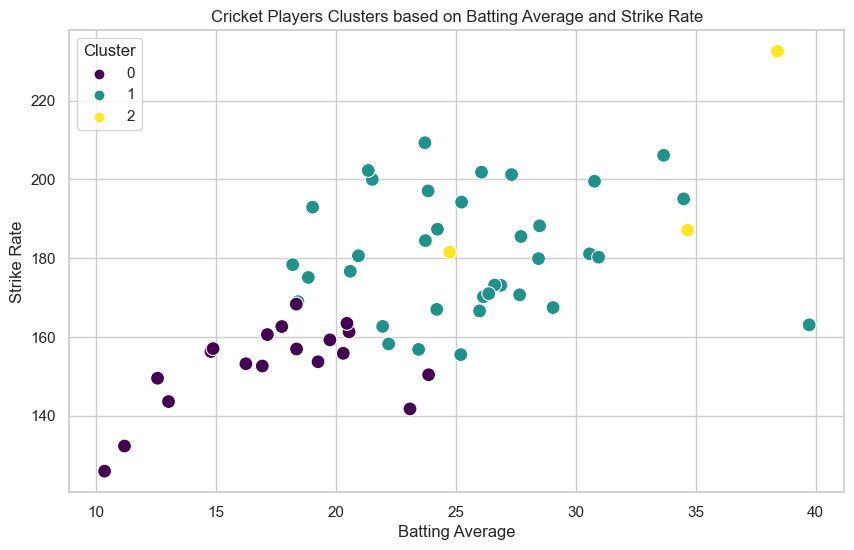

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Set the style of seaborn
sns.set(style="whitegrid")

# Create a scatter plot with 'average' on the x-axis and 'strike_rate' on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(x='average', y='strike_rate', hue='Cluster', data=sorted_data, palette='viridis', s=100)

# Set the title and labels of the plot
plt.title('Cricket Players Clusters based on Batting Average and Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')

# Show the plot
plt.legend(title='Cluster')
plt.show()

In [78]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Normalize the data
scaler = MinMaxScaler()
sorted_data.reset_index(drop=True, inplace=True)
filtered_sorted_batting_death_df = sorted_data
normalized_data = scaler.fit_transform(filtered_sorted_batting_death_df[['runs', 'average', 'strike_rate']])

# Define weights for the composite score
runs_weight = 0.1
avg_weight = 0.3
strike_rate_weight = 0.7

# Create a new column for the composite score
filtered_sorted_batting_death_df['performance'] = (
    runs_weight * normalized_data[:, 0] +
    avg_weight * normalized_data[:, 1] +
    strike_rate_weight * normalized_data[:, 2]
)

# Split the data into features and target variable
X = normalized_data
y = filtered_sorted_batting_death_df["performance"]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(3,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Make predictions
predictions = model.predict(X_test)

Epoch 1/100
2/2 [==============================] - 1s 4ms/step - loss: 0.6961 - accuracy: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6936 - accuracy: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6917 - accuracy: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6908 - accuracy: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.0000e+00
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6887 - accuracy: 0.0000e+00
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 0.6875 - accuracy: 0.0000e+00
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 0.6867 - accuracy: 

In [79]:
predictions

array([[0.2890216 ],
       [0.7334475 ],
       [0.46986967],
       [0.24131694],
       [0.23208609],
       [0.18577307],
       [0.5971772 ],
       [0.18665858],
       [0.39975986],
       [0.61263454],
       [0.329992  ],
       [0.4887587 ]], dtype=float32)

In [80]:
len(predictions)

12

In [81]:
output_players_performance = model.predict(X)
print(output_players_performance)

2/2 [==============================] - 0s 1ms/step
[[0.7458915 ]
 [0.9301663 ]
 [0.5971772 ]
 [0.71742773]
 [0.5465017 ]
 [0.4565052 ]
 [0.46986967]
 [0.48523217]
 [0.53091395]
 [0.5560136 ]
 [0.4807133 ]
 [0.7334475 ]
 [0.46743742]
 [0.40174526]
 [0.7802119 ]
 [0.68551636]
 [0.6143154 ]
 [0.39975986]
 [0.329992  ]
 [0.60700166]
 [0.63278466]
 [0.5849201 ]
 [0.61103636]
 [0.5876032 ]
 [0.36115375]
 [0.67210805]
 [0.623465  ]
 [0.71670693]
 [0.4492932 ]
 [0.72711563]
 [0.37677732]
 [0.46874756]
 [0.43078843]
 [0.60426277]
 [0.4887587 ]
 [0.4297729 ]
 [0.6126345 ]
 [0.3561944 ]
 [0.33073848]
 [0.28015885]
 [0.23208609]
 [0.31892246]
 [0.29800856]
 [0.18665858]
 [0.23451243]
 [0.30510178]
 [0.18440612]
 [0.28495905]
 [0.18577307]
 [0.33552518]
 [0.3472735 ]
 [0.27467704]
 [0.24131694]
 [0.2655183 ]
 [0.2890216 ]
 [0.23853445]
 [0.2500853 ]
 [0.19617821]]


In [82]:
len(output_players_performance)

58

In [83]:
filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance
0,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,2,0.749985
1,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,2,1.036712
2,KA Pollard,1708,941,69,24.753623,181.509033,0.257611,0.446136,2,0.574967
3,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,1,0.697617
4,DPMD Jayawardene,313,174,11,28.454545,179.885057,0.485623,0.172524,1,0.539528
5,MP Stoinis,497,292,19,26.157895,170.205479,0.370221,0.277666,1,0.460789
6,BJ Hodge,494,295,17,29.058824,167.457627,0.340081,0.279352,1,0.472274
7,CH Morris,457,264,17,26.882353,173.106061,0.245077,0.367615,1,0.485433
8,SV Samson,438,227,23,19.043478,192.951542,0.273973,0.438356,1,0.534687
9,S Dhawan,437,268,11,39.727273,163.059701,0.393593,0.192220,1,0.549906


# Best Batters In the Death

In [84]:
import pandas as pd

# Create a new dataframe from the array
performance_df = pd.DataFrame(output_players_performance, columns=['Actual Performance'])

# Concatenate the two dataframes along the column axis
merged_filtered_sorted_batting_death_df = pd.concat([filtered_sorted_batting_death_df, performance_df], axis=1)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.sort_values('Actual Performance', ascending=False)
merged_filtered_sorted_batting_death_df = merged_filtered_sorted_batting_death_df.reset_index(drop=True)
merged_filtered_sorted_batting_death_df

,Batter,runs,balls,Dismissals,average,strike_rate,four_percentage,sixer_percentage,Cluster,performance,Actual Performance
0,AB de Villiers,1421,611,37,38.405405,232.569558,0.298381,0.472906,2,1.036712,0.930166
1,CH Gayle,404,196,12,33.666667,206.122449,0.267327,0.519802,1,0.769070,0.780212
2,MS Dhoni,2530,1352,73,34.657534,187.130178,0.308300,0.360474,2,0.749985,0.745892
3,KL Rahul,552,283,16,34.500000,195.053004,0.362319,0.326087,1,0.711589,0.733447
4,AD Russell,854,408,36,23.722222,209.313725,0.281030,0.540984,1,0.708560,0.727116
5,SO Hetmyer,431,216,14,30.785714,199.537037,0.232019,0.487239,1,0.697617,0.717428
6,V Kohli,991,491,38,26.078947,201.832994,0.282543,0.387487,1,0.689707,0.716707
7,JC Buttler,328,163,12,27.333333,201.226994,0.304878,0.420732,1,0.668795,0.685516
8,RG Sharma,1145,581,48,23.854167,197.074010,0.314410,0.408734,1,0.642647,0.672108
9,RR Pant,534,264,25,21.360000,202.272727,0.359551,0.415730,1,0.623845,0.632785
